# `Regression_Neurons -----------------------------------`
### [Theory](http://localhost:8888/notebooks/DL_Concepts/ANN/Optimization%20functions.ipynb)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset_boston = datasets.load_boston()

In [32]:
dataset_boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [34]:
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
dataset_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
boston = pd.DataFrame(dataset_boston.data, columns=dataset_boston.feature_names)

In [37]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [39]:
boston.shape

(506, 13)

In [40]:
boston['price'] = dataset_boston.target

In [41]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

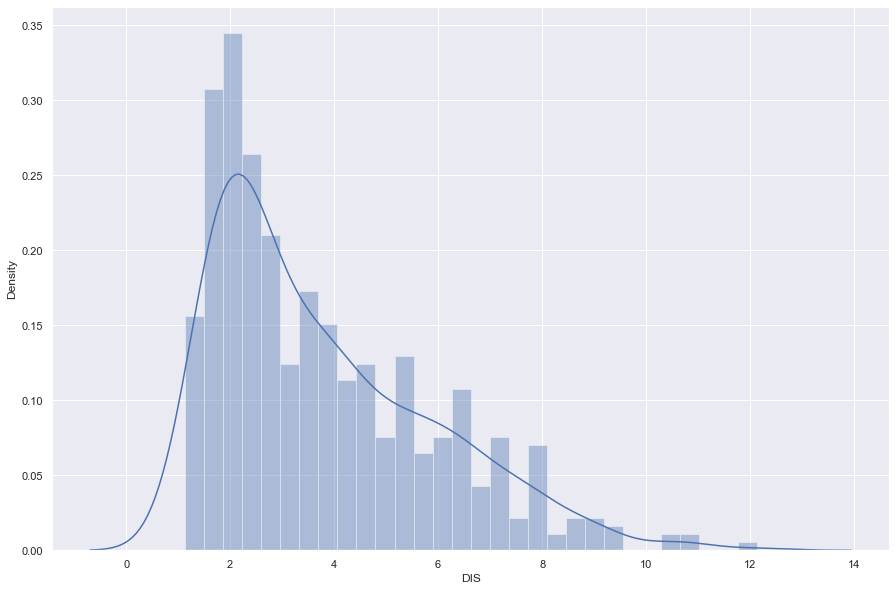

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(boston['DIS'], bins=30)
plt.show()

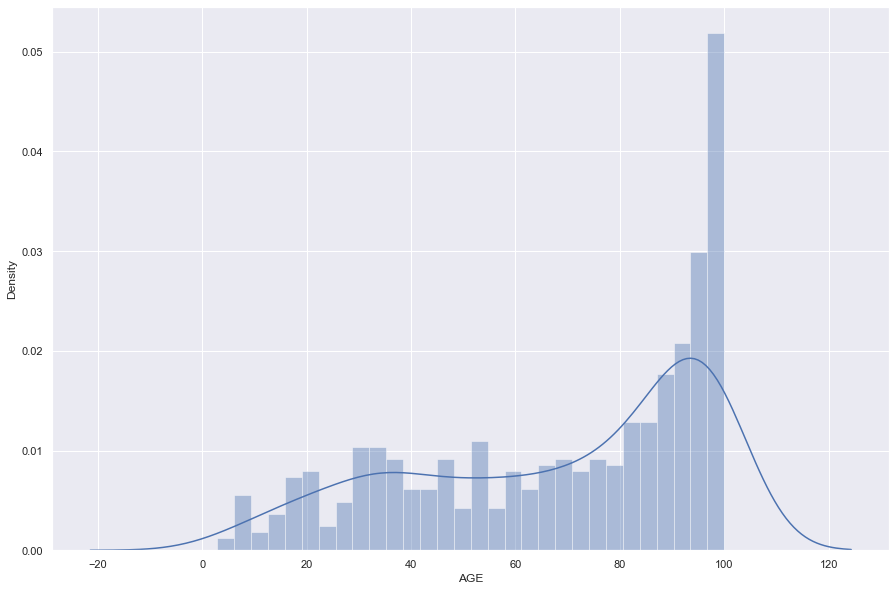

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(boston['AGE'], bins=30)
plt.show()

<AxesSubplot:>

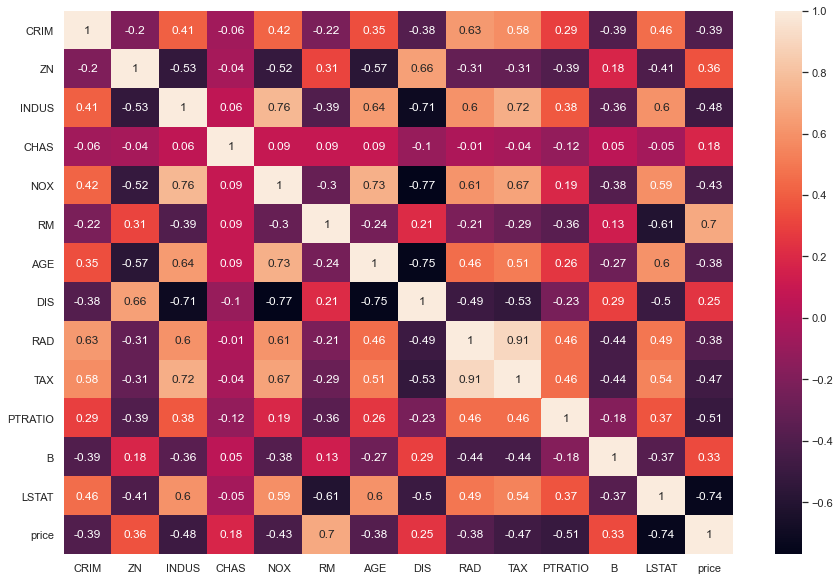

In [45]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TAX', ylabel='INDUS'>

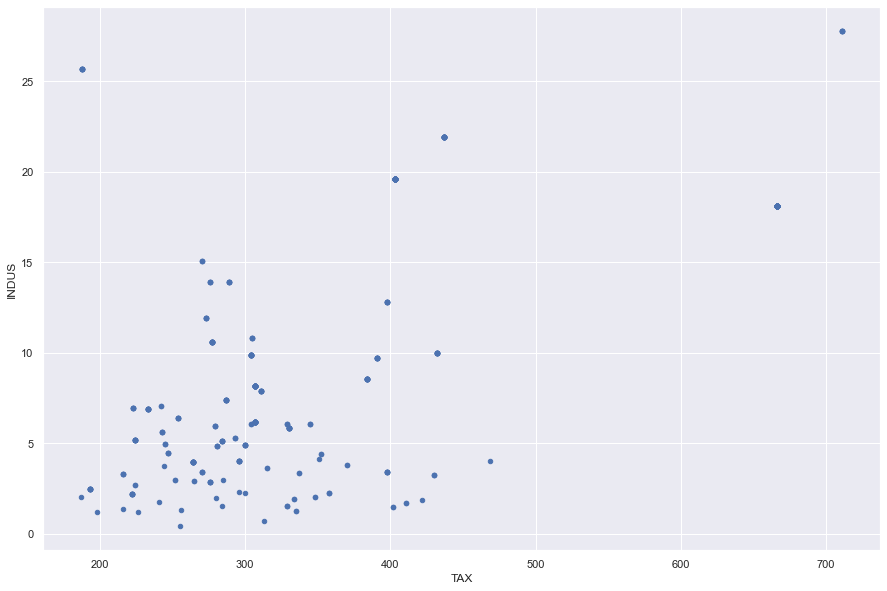

In [46]:
boston.plot.scatter(x='TAX', y='INDUS')

In [48]:
x = dataset_boston.data
y = dataset_boston.target

## Model

In [55]:
len(boston.columns)

14

In [49]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [50]:
network.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss='mse', metrics=['mae'])

In [51]:
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
____________________________________________________

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [57]:
train_X = preprocessing.normalize(X_train)
test_X = preprocessing.normalize(X_test)

In [58]:
hist = network.fit(train_X, Y_train, epochs = 100, validation_data = (test_X, Y_test), batch_size=1)

Epoch 1/100
404/404 [==============================] - 4s 4ms/step - loss: 103.8808 - mae: 7.4027 - val_loss: 41.9046 - val_mae: 4.4464
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 79.0071 - mae: 6.2868 - val_loss: 271.8563 - val_mae: 15.5698
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 75.4046 - mae: 6.2797 - val_loss: 36.7893 - val_mae: 4.4119
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 68.6959 - mae: 5.7720 - val_loss: 55.1974 - val_mae: 6.3282
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 61.8725 - mae: 5.4619 - val_loss: 32.1832 - val_mae: 4.1197
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 60.1553 - mae: 5.6135 - val_loss: 56.3421 - val_mae: 5.3007
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 62.5027 - mae: 5.5469 - val_loss: 28.4376 - val_mae: 3.4437
Epoch 8/100
404/404 [==============================]

404/404 [==============================] - 1s 2ms/step - loss: 29.9555 - mae: 3.9836 - val_loss: 25.3827 - val_mae: 3.0490
Epoch 62/100
404/404 [==============================] - 1s 2ms/step - loss: 29.5514 - mae: 3.9067 - val_loss: 24.9717 - val_mae: 3.7588
Epoch 63/100
404/404 [==============================] - 1s 2ms/step - loss: 28.2275 - mae: 3.7768 - val_loss: 26.0811 - val_mae: 3.3905
Epoch 64/100
404/404 [==============================] - 1s 2ms/step - loss: 32.7310 - mae: 4.0459 - val_loss: 19.6872 - val_mae: 2.9383
Epoch 65/100
404/404 [==============================] - 1s 2ms/step - loss: 31.1309 - mae: 3.9488 - val_loss: 23.2038 - val_mae: 3.5009
Epoch 66/100
404/404 [==============================] - 1s 2ms/step - loss: 28.3015 - mae: 3.8486 - val_loss: 21.9808 - val_mae: 3.3422
Epoch 67/100
404/404 [==============================] - 1s 2ms/step - loss: 27.4977 - mae: 3.7446 - val_loss: 21.1518 - val_mae: 3.1336
Epoch 68/100
404/404 [==============================] - 1s 2m

## `END -------------------------------------------------------`